In [323]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [324]:
# create known parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [325]:
# train test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test)


(40, 10)

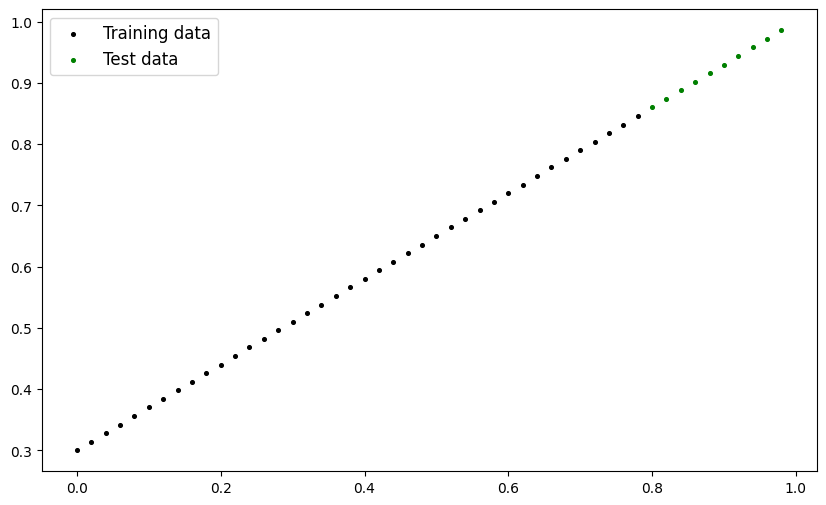

In [326]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    
    plt.figure(figsize=(10,6))
    
    plt.scatter(train_data, train_labels, color='k', s=7, label='Training data')
    plt.scatter(test_data, test_labels, color='g', s=7, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=7, label="Predictions")

    plt.legend(fontsize=12)

plot_predictions()

In [327]:
# My first pytorch model!✨

class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias
    
    
    

    

In [328]:
torch.manual_seed(seed=42)

# instantiation
model_0 = LinearRegressionModel()

list(model_0.parameters()) #list objects parameters
model_0.state_dict() # named parameters

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

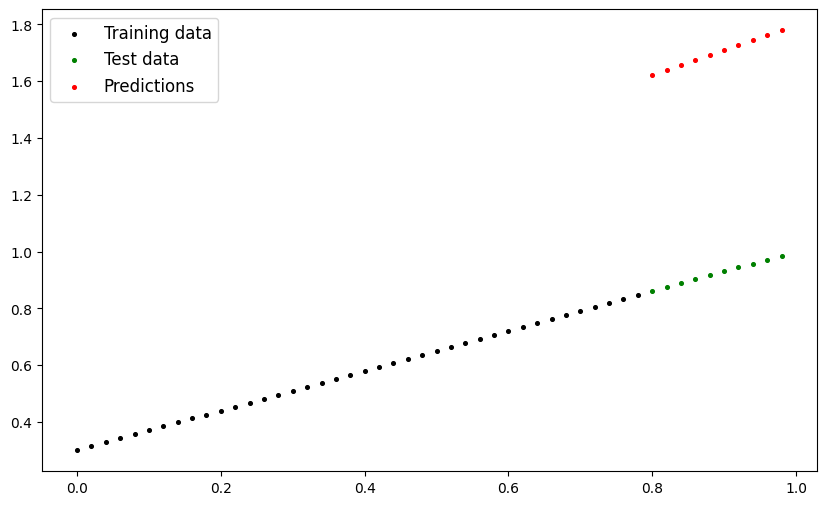

In [329]:
# make predictions
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

# Train model

### Need to train
* __Loss function__ helps to know how wrong our models prediction compared to the testing values.
* __Optimizer__ takes the loss of a model and adjusts the models parameters (weight, bias).

### Specific to pytorch
* training loop
* testing loop

In [330]:
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [331]:
# setups loss function
loss_fn = nn.L1Loss()

# setup an optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate

## Building a training loop in pytorch
* loop through data
* forward pass aka propagation
* calculate loss (compare forward pass to truth labels)
* loss backward aka backward propagation
* optimizer step

In [332]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [333]:
torch.manual_seed(seed=42)
epochs = 100

# track values
epoch_count = []
train_loss_values = []
test_loss_values = []

### training
for epoch in range(epochs):
    # set model to traiing mode
    model_0.train() # set all parameters that requires gradient requres gradient
    
    # forward propagation
    y_pred = model_0(X_train)

    # calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f'Loss: {loss:.5f}')

    # optimizer zero grad
    optimizer.zero_grad()

    # back propagation on the loss with respect to the model's parameters
    loss.backward()

    # step optimizer
    optimizer.step()

### Testing
    model_0.eval() # turns off settings not needed for testing
    with torch.inference_mode(): # turns off gradient tracking
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)
        
    if epoch % 10 == 0: 
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

print( model_0.state_dict())

Loss: 0.68609
epoch: 0 | loss: 0.6860889196395874 | test loss: 0.7637526988983154
Loss: 0.67457
Loss: 0.66305
Loss: 0.65153
Loss: 0.64000
Loss: 0.62848
Loss: 0.61696
Loss: 0.60544
Loss: 0.59392
Loss: 0.58240
Loss: 0.57088
epoch: 10 | loss: 0.5708791017532349 | test loss: 0.6290428042411804
Loss: 0.55936
Loss: 0.54784
Loss: 0.53632
Loss: 0.52480
Loss: 0.51327
Loss: 0.50175
Loss: 0.49023
Loss: 0.47871
Loss: 0.46719
Loss: 0.45567
epoch: 20 | loss: 0.45566922426223755 | test loss: 0.4943329691886902
Loss: 0.44415
Loss: 0.43263
Loss: 0.42111
Loss: 0.40959
Loss: 0.39806
Loss: 0.38654
Loss: 0.37502
Loss: 0.36350
Loss: 0.35198
Loss: 0.34046
epoch: 30 | loss: 0.34045934677124023 | test loss: 0.35962313413619995
Loss: 0.32894
Loss: 0.31742
Loss: 0.30590
Loss: 0.29438
Loss: 0.28285
Loss: 0.27133
Loss: 0.25981
Loss: 0.24829
Loss: 0.23677
Loss: 0.22525
epoch: 40 | loss: 0.2252494841814041 | test loss: 0.2249133139848709
Loss: 0.21373
Loss: 0.20221
Loss: 0.19069
Loss: 0.17917
Loss: 0.16764
Loss: 0.1

Text(0.5, 1.0, 'train-test loss curve')

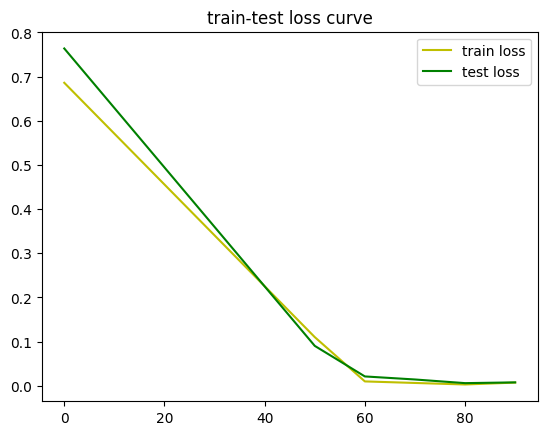

In [339]:
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values)), c='y', label='train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values)), c='g', label='test loss')
plt.legend()
plt.title('train-test loss curve')


In [335]:
num = 123.123123
print(f'{num}')

123.123123


In [336]:
weight, bias

(0.7, 0.3)

In [337]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

Text(0.5, 1.0, 'With backpropagation, gradient descent')

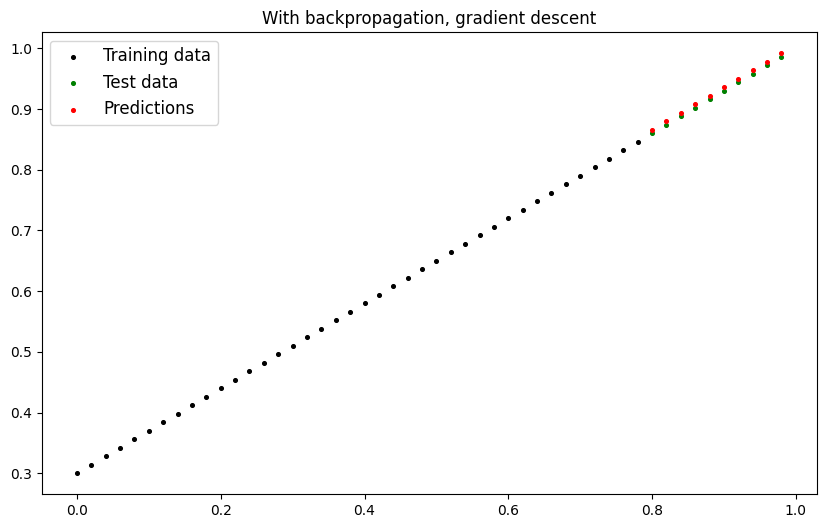

In [338]:
plot_predictions(predictions=y_preds_new)
plt.title("With backpropagation, gradient descent")

## Saving a model in PyTorch
__methods:__   
__torch.save()__ - python pickle format (__pure python__)  
__torch.load()__ - load a saved pytorch object  
__torch.nn.Module.load_state_dict()__ - load model's saved state dictionary